# Notebook 1: Clean the data and build a baseline

1* Clean the data of NaN and erroneous values.

2* Visualize and analyse the data to detect potential issues.

3* Build a baseline Mean Absolute Error on the test dataset: mae = 2.61C

In [ ]:
import numpy as np
import pandas as pd
from datetime import date
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt


In [ ]:
# Checking the encoding to ensure proper data loading
import chardet
dataset_path = "/content/drive/MyDrive/data/mpi_roof_global.csv"
with open(dataset_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

# 1. Data overview

In [ ]:
# Load the csv data file
dataset_path = "/content/drive/MyDrive/data/mpi_roof_global.csv"
raw_data = pd.read_csv(dataset_path, encoding='ascii')
print(raw_data.shape)

(806391, 16)


In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),806391.0,989.479986,8.637193,913.60,984.44,989.87,995.10,1020.07
T (degC),806391.0,9.887356,8.265368,-23.01,3.75,9.65,15.82,37.95
Tpot (K),806391.0,283.907777,8.355773,250.60,277.77,283.72,289.86,312.21
Tdew (degC),806391.0,5.207493,6.506166,-25.01,0.55,5.46,10.17,23.11
rh (%),806391.0,75.401968,17.321303,12.95,63.83,78.60,89.50,100.00
VPmax (mbar),806391.0,13.917221,7.857134,0.95,7.99,12.01,18.00,66.13
VPact (mbar),806391.0,9.648586,4.129602,0.79,6.36,9.01,12.44,28.32
VPdef (mbar),806391.0,4.268560,5.196930,0.00,0.90,2.28,5.62,56.72
sh (g/kg),806391.0,6.093840,2.621958,0.50,4.01,5.68,7.86,18.13
H2OC (mmol/mol),806391.0,9.754391,4.180566,0.80,6.43,9.11,12.57,28.82


# 2. Data Cleaning

#### Check number of NaN

In [ ]:
total_nan = raw_data.isna().sum().sum()
print(f"Total NaN values in DataFrame: {total_nan}")

Total NaN values in DataFrame: 0


### A. Clean the wind speed column: 'wv (m/s)'

In [ ]:
# Pandas documentation at:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html

# Identify negative numbers
negative_wv = raw_data['wv (m/s)'] < 0
print("List of negative numbers:", raw_data.loc[negative_wv, 'wv (m/s)'].tolist())
print("Length of negative numbers:", len(raw_data.loc[negative_wv, 'wv (m/s)'].tolist()))

# Replace negative numbers with NaN
raw_data.loc[negative_wv, 'wv (m/s)'] = pd.NA

# Forward fill the NaN values
raw_data['wv (m/s)'] = raw_data['wv (m/s)'].ffill()
print("List of negative numbers:", raw_data.loc[negative_wv, 'wv (m/s)'].tolist())

List of negative numbers: [-0.08, -0.19, -0.29, -0.35, -0.39, -0.38, -0.34, -0.25, -0.11, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0]
Length of negative numbers: 28
List of negative numbers: [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 6.16, 2.18]


### B. Clean the max wind speed column: 'max. wv (m/s)'

In [ ]:
# Identify negative numbers
negative_wvmax = raw_data['max. wv (m/s)'] < 0
print("List of negative numbers:", raw_data.loc[negative_wvmax, 'max. wv (m/s)'].tolist())
print("Length of negative numbers:", len(raw_data.loc[negative_wvmax, 'max. wv (m/s)'].tolist()))

# Replace negative numbers with NaN
raw_data.loc[negative_wvmax, 'max. wv (m/s)'] = pd.NA

# Forward fill the NaN values
raw_data['max. wv (m/s)'] = raw_data['max. wv (m/s)'].ffill()
print("List of negative numbers:", raw_data.loc[negative_wvmax, 'max. wv (m/s)'].tolist())


List of negative numbers: [-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0]
Length of negative numbers: 20
List of negative numbers: [5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22, 5.22]



### C. Clean the CO2 column: 'CO2 (ppm)'

In [ ]:
# Identify negative numbers
negative_wvmax = raw_data['CO2 (ppm)'] < 350
print("List of negative numbers:", raw_data.loc[negative_wvmax, 'CO2 (ppm)'].tolist())
print("Length of negative numbers:", len(raw_data.loc[negative_wvmax, 'CO2 (ppm)'].tolist()))

# Replace negative numbers with NaN
raw_data.loc[negative_wvmax, 'CO2 (ppm)'] = pd.NA

# Forward fill the NaN values
raw_data['CO2 (ppm)'] = raw_data['CO2 (ppm)'].ffill()
print("List of negative numbers:", raw_data.loc[negative_wvmax, 'CO2 (ppm)'].tolist())

List of negative numbers: [347.0, 343.8, 340.5, 337.4, 334.2, 331.0, 328.0, 324.9, 321.9, 318.9, 315.9, 312.9, 310.0, 307.2, 304.5, 301.7, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.

## Describe after cleaning

In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),806391.0,989.479986,8.637193,913.60,984.44,989.87,995.10,1020.07
T (degC),806391.0,9.887356,8.265368,-23.01,3.75,9.65,15.82,37.95
Tpot (K),806391.0,283.907777,8.355773,250.60,277.77,283.72,289.86,312.21
Tdew (degC),806391.0,5.207493,6.506166,-25.01,0.55,5.46,10.17,23.11
rh (%),806391.0,75.401968,17.321303,12.95,63.83,78.60,89.50,100.00
VPmax (mbar),806391.0,13.917221,7.857134,0.95,7.99,12.01,18.00,66.13
VPact (mbar),806391.0,9.648586,4.129602,0.79,6.36,9.01,12.44,28.32
VPdef (mbar),806391.0,4.268560,5.196930,0.00,0.90,2.28,5.62,56.72
sh (g/kg),806391.0,6.093840,2.621958,0.50,4.01,5.68,7.86,18.13
H2OC (mmol/mol),806391.0,9.754391,4.180566,0.80,6.43,9.11,12.57,28.82


Text(0.5, 1.0, 'wv (m/s)')

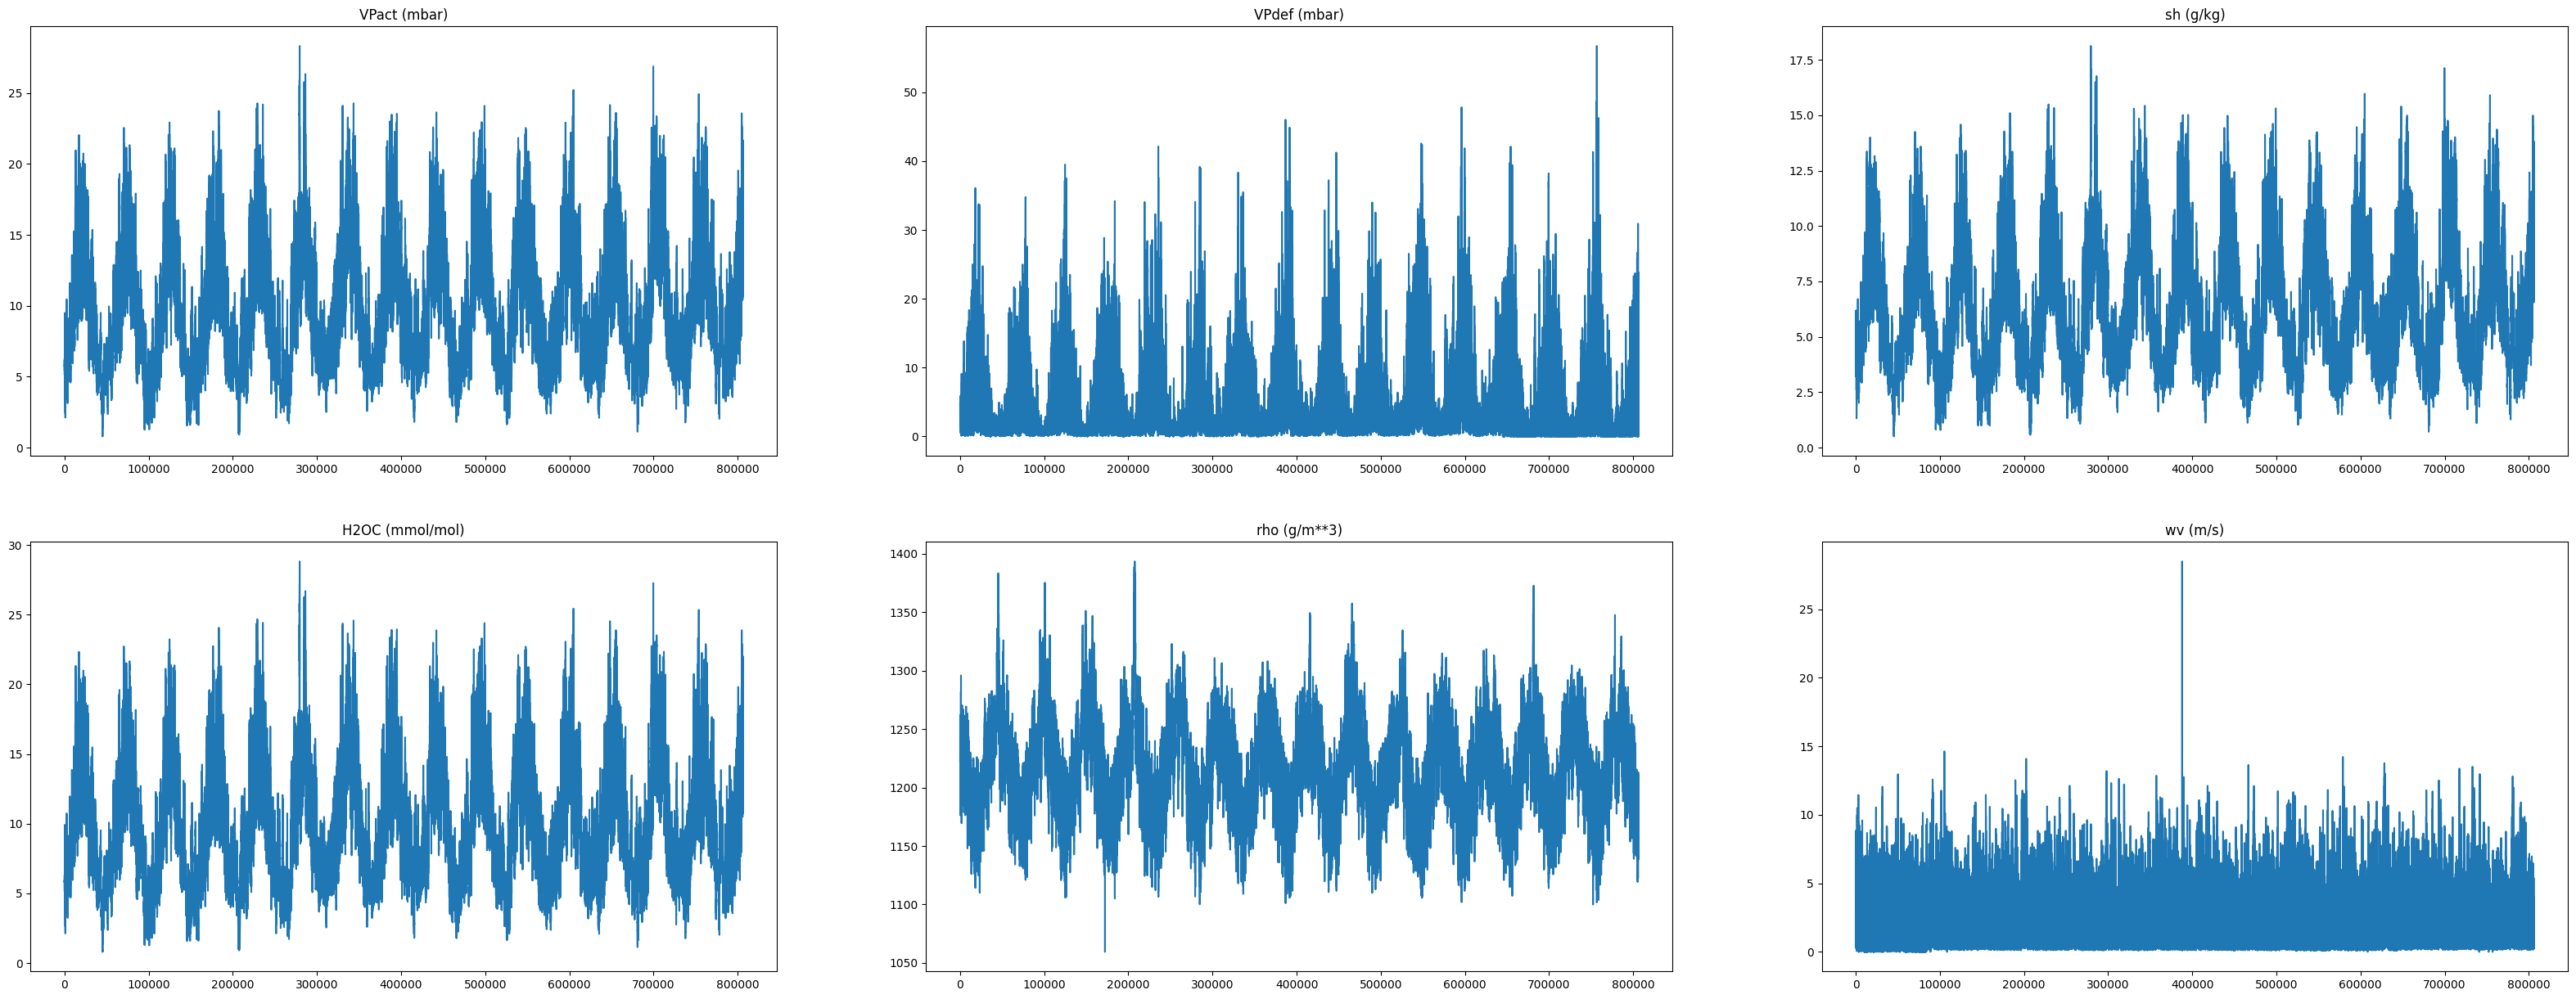

In [ ]:
# Display Features 6 to 11
fig, ax = plt.subplots(2, 3, figsize=(40, 15))
ax[0,0].plot(l, raw_data[raw_data.columns[6]])
ax[0,0].set_title(raw_data.columns[6])
ax[0,1].plot(l, raw_data[raw_data.columns[7]])
ax[0,1].set_title(raw_data.columns[7])
ax[0,2].plot(l, raw_data[raw_data.columns[8]])
ax[0,2].set_title(raw_data.columns[8])

ax[1,0].plot(l, raw_data[raw_data.columns[9]])
ax[1,0].set_title(raw_data.columns[9])
ax[1,1].plot(l, raw_data[raw_data.columns[10]])
ax[1,1].set_title(raw_data.columns[10])
ax[1,2].plot(l, raw_data[raw_data.columns[11]])
ax[1,2].set_title(raw_data.columns[11])


Text(0.5, 1.0, 'CO2 (ppm)')

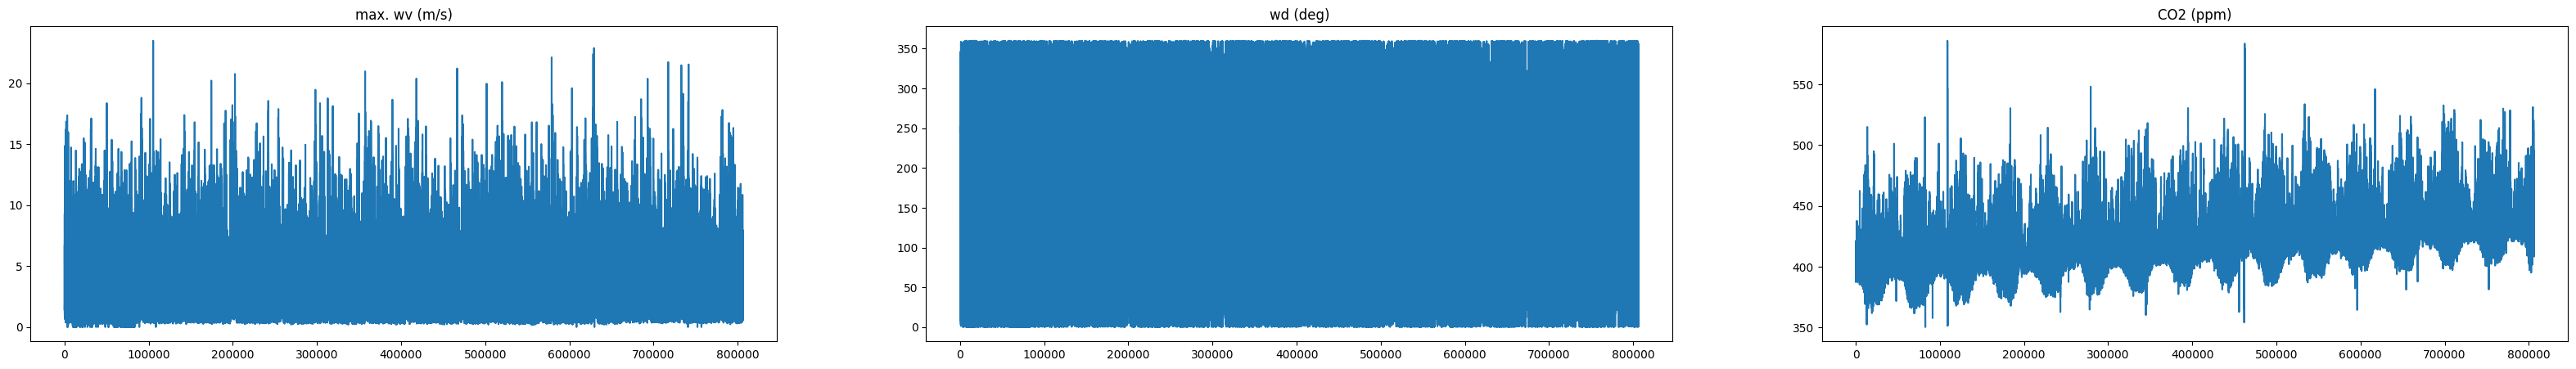

In [ ]:
# Display Features 12 to 14
fig, ax = plt.subplots(1, 3, figsize=(40, 5))
ax[0].plot(l, raw_data[raw_data.columns[12]])
ax[0].set_title(raw_data.columns[12])
ax[1].plot(l, raw_data[raw_data.columns[13]])
ax[1].set_title(raw_data.columns[13])
ax[2].plot(l, raw_data[raw_data.columns[14]])
ax[2].set_title(raw_data.columns[14])


In [ ]:
raw_data.corr()

<ipython-input-12-6e5ccd0fb62a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),CO2 (ppm)
p (mbar),1.000000,-0.055547,-0.138937,-0.084685,-0.021426,-0.041691,-0.072031,-0.005795,-0.088163,-0.088235,0.330356,-0.234342,-0.232244,-0.088811,0.133477
T (degC),-0.055547,1.000000,0.996487,0.873171,-0.580955,0.955098,0.848099,0.770066,0.847194,0.847593,-0.959642,0.087442,0.120759,0.012563,-0.318266
Tpot (K),-0.138937,0.996487,1.000000,0.873100,-0.574481,0.950909,0.847282,0.764382,0.847752,0.848152,-0.979471,0.106574,0.139426,0.019982,-0.327037
Tdew (degC),-0.084685,0.873171,0.873100,1.000000,-0.121042,0.778590,0.971142,0.405434,0.970458,0.970874,-0.865411,-0.066344,-0.053693,0.041337,-0.121646
rh (%),-0.021426,-0.580955,-0.574481,-0.121042,1.000000,-0.621046,-0.118301,-0.844942,-0.117665,-0.117783,0.516619,-0.308498,-0.355982,0.023312,0.470569
VPmax (mbar),-0.041691,0.955098,0.950909,0.778590,-0.621046,1.000000,0.797921,0.877828,0.797456,0.797528,-0.902155,0.088942,0.121169,-0.028806,-0.326061
VPact (mbar),-0.072031,0.848099,0.847282,0.971142,-0.118301,0.797921,1.000000,0.411731,0.999839,0.999843,-0.834152,-0.081195,-0.072051,0.014296,-0.103666
VPdef (mbar),-0.005795,0.770066,0.764382,0.405434,-0.844942,0.877828,0.411731,1.000000,0.411155,0.411261,-0.701106,0.198990,0.240447,-0.054910,-0.410589
sh (g/kg),-0.088163,0.847194,0.847752,0.970458,-0.117665,0.797456,0.999839,0.411155,1.000000,0.999997,-0.837669,-0.077041,-0.068021,0.015678,-0.105578
H2OC (mmol/mol),-0.088235,0.847593,0.848152,0.970874,-0.117783,0.797528,0.999843,0.411261,0.999997,1.000000,-0.838091,-0.076959,-0.067915,0.015863,-0.105773


In [ ]:
raw_data.corr(method='spearman')

<ipython-input-13-c54669f568ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr(method='spearman')


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),CO2 (ppm)
p (mbar),1.000000,-0.070614,-0.149612,-0.095439,-0.003250,-0.070613,-0.095440,-0.033103,-0.112869,-0.112871,0.322412,-0.206410,-0.202191,-0.078265,0.146522
T (degC),-0.070614,1.000000,0.996173,0.882455,-0.544092,1.000000,0.882455,0.786605,0.882018,0.882020,-0.959542,0.090318,0.122213,0.029288,-0.359431
Tpot (K),-0.149612,0.996173,1.000000,0.880791,-0.540217,0.996173,0.880791,0.782771,0.881989,0.881991,-0.980212,0.107576,0.138840,0.034316,-0.369036
Tdew (degC),-0.095439,0.882455,0.880791,1.000000,-0.133850,0.882455,1.000000,0.453768,0.999813,0.999814,-0.862674,-0.070435,-0.056530,0.031787,-0.172751
rh (%),-0.003250,-0.544092,-0.540217,-0.133850,1.000000,-0.544092,-0.133850,-0.932698,-0.133699,-0.133702,0.500086,-0.342822,-0.386478,-0.029334,0.492488
VPmax (mbar),-0.070613,1.000000,0.996173,0.882455,-0.544092,1.000000,0.882455,0.786605,0.882018,0.882019,-0.959542,0.090318,0.122213,0.029288,-0.359431
VPact (mbar),-0.095440,0.882455,0.880791,1.000000,-0.133850,0.882455,1.000000,0.453768,0.999813,0.999814,-0.862674,-0.070435,-0.056530,0.031788,-0.172752
VPdef (mbar),-0.033103,0.786605,0.782771,0.453768,-0.932698,0.786605,0.453768,1.000000,0.453554,0.453556,-0.740626,0.280371,0.324265,0.042347,-0.501842
sh (g/kg),-0.112869,0.882018,0.881989,0.999813,-0.133699,0.882018,0.999813,0.453554,1.000000,0.999999,-0.867442,-0.066429,-0.052648,0.032949,-0.174985
H2OC (mmol/mol),-0.112871,0.882020,0.881991,0.999814,-0.133702,0.882019,0.999814,0.453556,0.999999,1.000000,-0.867444,-0.066424,-0.052644,0.032950,-0.174987


## 3. Save clean file. (before feature engineering in next notebook).

In [ ]:
raw_data_path = '/content/drive/MyDrive/data/mpi_roof_global_clean.csv'

# Uncomment the line below to create the dataset file locally
# raw_data.to_csv(raw_data_path)

In [ ]:
# We start by loading our dataset into a dataframe
raw_data = pd.read_csv(raw_data_path, index_col=0)

print(raw_data.shape)

(806391, 16)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),CO2 (ppm)
0,27.02.2008 16:00:00,988.77,7.98,282.05,-0.82,53.62,10.72,5.75,4.97,3.63,5.82,1222.53,4.02,9.25,244.8,387.5
1,27.02.2008 16:10:00,988.79,7.81,281.88,-0.82,54.26,10.60,5.75,4.85,3.63,5.82,1223.29,4.01,6.25,252.0,391.5
2,27.02.2008 16:20:00,988.81,7.75,281.82,-0.76,54.72,10.56,5.78,4.78,3.64,5.84,1223.57,3.08,5.50,246.5,391.4
3,27.02.2008 16:30:00,988.88,7.70,281.76,-0.86,54.53,10.52,5.74,4.78,3.62,5.80,1223.89,3.10,7.63,242.1,391.8
4,27.02.2008 16:40:00,989.01,7.60,281.65,-0.81,55.09,10.45,5.76,4.69,3.63,5.82,1224.48,3.53,6.50,250.3,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806386,30.06.2023 23:20:00,985.13,15.51,289.90,15.15,97.70,17.65,17.24,0.41,10.96,17.50,1181.01,0.88,1.35,233.5,435.1
806387,30.06.2023 23:30:00,985.11,15.40,289.79,15.15,98.40,17.52,17.24,0.28,10.96,17.50,1181.43,0.93,1.14,223.6,436.9
806388,30.06.2023 23:40:00,985.07,15.27,289.66,15.25,99.90,17.38,17.36,0.02,11.04,17.62,1181.86,1.02,1.49,236.3,439.6
806389,30.06.2023 23:50:00,985.02,15.32,289.72,15.32,100.00,17.43,17.43,0.00,11.08,17.70,1181.56,1.04,1.33,233.2,442.0


In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),806391.0,989.479986,8.637193,913.60,984.44,989.87,995.10,1020.07
T (degC),806391.0,9.887356,8.265368,-23.01,3.75,9.65,15.82,37.95
Tpot (K),806391.0,283.907777,8.355773,250.60,277.77,283.72,289.86,312.21
Tdew (degC),806391.0,5.207493,6.506166,-25.01,0.55,5.46,10.17,23.11
rh (%),806391.0,75.401968,17.321303,12.95,63.83,78.60,89.50,100.00
VPmax (mbar),806391.0,13.917221,7.857134,0.95,7.99,12.01,18.00,66.13
VPact (mbar),806391.0,9.648586,4.129602,0.79,6.36,9.01,12.44,28.32
VPdef (mbar),806391.0,4.268560,5.196930,0.00,0.90,2.28,5.62,56.72
sh (g/kg),806391.0,6.093840,2.621958,0.50,4.01,5.68,7.86,18.13
H2OC (mmol/mol),806391.0,9.754391,4.180566,0.80,6.43,9.11,12.57,28.82


In [ ]:
# print(time_data.iloc[[0]])      # returns a pd dataframe
# print(time_data.iloc[0])        # returns a pd series
# print(time_data.iloc[0,0])      # returns a text string
raw_data.keys()

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'CO2 (ppm)'],
      dtype='object')

# 4. Dataset splitting

# Drop unused features

In [ ]:
raw_data.drop(['Date Time'], axis=1, inplace=True)

### Computing the ssplit required for 60/20/20

In [ ]:
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.20 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 483834
num_val_samples: 161278
num_test_samples: 161279


# Create 3 datasets

In [ ]:
batch_size = 256
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    # Using data from index 0 to length of train_samples (excl.)
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    # Using data from index train_samples (incl.) to train+validation (excl.)
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    # Using data from index train+validation (incl.) till end of data.
    start_index=num_train_samples + num_val_samples)



# 5. Naive baseline

Prediction in 24h = temperature now.

A common-sense, non-machine-learning baseline.

Test MAE = 2.61C

In [ ]:
def evaluate_naive_method(dataset):
  """
  Computes MAE when prediction in 24h assumed to be equal to the current temperature.

  Source:
  - This function is a simple wrapper around the code from F. Chollet [2021] 'Deep Learning with Python'.
  """
    total_abs_err = 0.0
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen


print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.63
Test MAE: 2.61
